# Capstone Project - The Battle of the Neighborhood

## Finding a Family-friendly Neighborhood in New York City

## Applied Data Science Capstone 



## 1. Problem
### This project aims to find the best Borough and Neighborhood combination for a family with school-aged children relocating to New York City. 



## 2. Data
### Data from Kaggle was used for Crime data for New York City from 2013-2015. 
https://www.kaggle.com/adamschroeder/crimes-new-york-city
### Data from Kaggle was also used for the education data. SAT scores for New York City schools for th 2014-2015 school year were provided. 
https://www.kaggle.com/nycopendata/high-schools#scores.csv
### Data from foursquare.com was then used to find venue and recreation (parks) data for New York City. 
### New York City map data was also obtained using a data set that is available on the web. 
 https://geo.nyu.edu/catalog/nyu_2451_34572


## 3. Exploratory Data Analysis
### a. The data from Kaggle is imported. 
### b. The school data was analyzed and a box plot is created. 
### c. The crime data is analyzed and a bar plot is created. 

In [15]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0



print('Folium installed')
print('Libraries imported.')

Matplotlib version:  3.0.2
Folium installed
Libraries imported.


In [16]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# Geopy isn't available?
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library
print('Libraries imported.')



Libraries imported.


In [4]:
#!conda install -c conda-forge geocoder --yes
#import geocoder

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
#from IPython.display import Image 
#from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

In [17]:
CLIENT_ID = 'BEAPWRG0JOWTWTNU4CZIMAJ02AAM5MBOVSLA1OMMY4X2T5CT' # your Foursquare ID
CLIENT_SECRET = 'WP0TC2MBBCNKCBWXMACGMDZCLTPPCJDDBK3W5FVKQ0PLIYHS' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BEAPWRG0JOWTWTNU4CZIMAJ02AAM5MBOVSLA1OMMY4X2T5CT
CLIENT_SECRET:WP0TC2MBBCNKCBWXMACGMDZCLTPPCJDDBK3W5FVKQ0PLIYHS


In [20]:
body = client_e3fbcbe60f4449df95c076ab802ff46e.get_object(Bucket='finalcapstonecoursera-donotdelete-pr-157ulpupf5qd7x',Key='scores.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

NameError: name 'client_e3fbcbe60f4449df95c076ab802ff46e' is not defined

In [33]:

body = client_e3fbcbe60f4449df95c076ab802ff46e.get_object(Bucket='finalcapstonecoursera-donotdelete-pr-157ulpupf5qd7x',Key='scores.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
df_scores1 = df_scores.dropna(subset = ["Average Score (SAT Math)"])

In [34]:
df_scores1.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [51]:
df_scores_manhattan = df_scores1[df_scores1['Borough'].str.contains("Manhattan")]
df_scores_bronx = df_scores1[df_scores1['Borough'].str.contains("Bronx")]
df_scores_queens = df_scores1[df_scores1['Borough'].str.contains("Queens")] 
df_scores_brooklyn = df_scores1[df_scores1['Borough'].str.contains("Brookly")]
df_scores_statenisland = df_scores1[df_scores1['Borough'].str.contains("Staten Island")]

In [54]:
df_scores_manhattan.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [55]:
df_scores_manhattan_math = df_scores_manhattan.filter(['Average Score (SAT Math)'], axis=1)

df_scores_bronx_math = df_scores_bronx.filter(['Average Score (SAT Math)'], axis=1)
df_scores_queens_math = df_scores_queens.filter(['Average Score (SAT Math)'], axis=1)
df_scores_brooklyn_math = df_scores_brooklyn.filter(['Average Score (SAT Math)'], axis=1)
df_scores_statenisland_math = df_scores_statenisland.filter(['Average Score (SAT Math)'], axis=1)

#new = old.filter(['A','B','D'], axis=1)

In [47]:
df_scores_manhattan_math.head()

,Average Score (SAT Math)
2,657.0
3,395.0
4,418.0
5,613.0
6,410.0


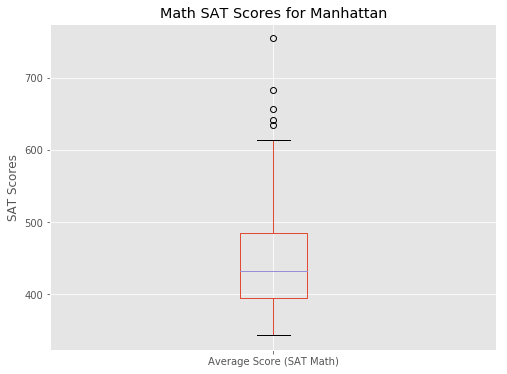

In [50]:

df_scores_manhattan_math.plot(kind='box', figsize=(8, 6))

plt.title('Math SAT Scores for Manhattan')
plt.ylabel('SAT Scores')

plt.show()


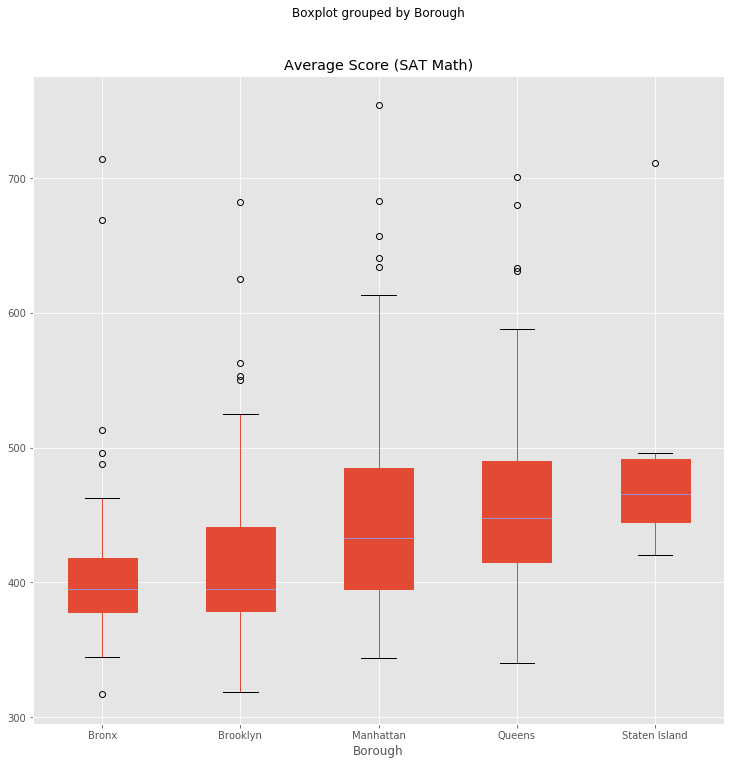

In [81]:
df_scores1.boxplot(by ='Borough', column =['Average Score (SAT Math)'], grid = True, patch_artist=True, figsize=(12,12))


In [6]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e3fbcbe60f4449df95c076ab802ff46e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ejX_SFbcpda0BhhnOTnklvEiTIxRiRzBv45wbpKJDNJp',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e3fbcbe60f4449df95c076ab802ff46e.get_object(Bucket='finalcapstonecoursera-donotdelete-pr-157ulpupf5qd7x',Key='NYPD_Complaint_Data_Historic.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_crime = pd.read_csv(body)
df_crime.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [8]:
for col in df_crime.columns: 
    print(col) 

CMPLNT_NUM
CMPLNT_FR_DT
CMPLNT_FR_TM
CMPLNT_TO_DT
CMPLNT_TO_TM
RPT_DT
KY_CD
OFNS_DESC
PD_CD
PD_DESC
CRM_ATPT_CPTD_CD
LAW_CAT_CD
JURIS_DESC
BORO_NM
ADDR_PCT_CD
LOC_OF_OCCUR_DESC
PREM_TYP_DESC
PARKS_NM
HADEVELOPT
X_COORD_CD
Y_COORD_CD
Latitude
Longitude
Lat_Lon


In [9]:
df_crime_count=df_crime.groupby('BORO_NM').size()

In [10]:
df_crimecount_frame=df_crime_count.to_frame().reset_index()

In [11]:
df_crimecount_frame

,BORO_NM,0
0,BRONX,227477
1,BROOKLYN,315648
2,MANHATTAN,244749
3,QUEENS,211958
4,STATEN ISLAND,48743


In [12]:
df_crimecount_frame.rename(columns={"BORO_NM":"Borough"}, inplace=True)
df_crimecount_frame = df_crimecount_frame.rename(columns= {0: 'Crime Count'})

In [13]:
df_crimecount_frame.head()

,Borough,Crime Count
0,BRONX,227477
1,BROOKLYN,315648
2,MANHATTAN,244749
3,QUEENS,211958
4,STATEN ISLAND,48743


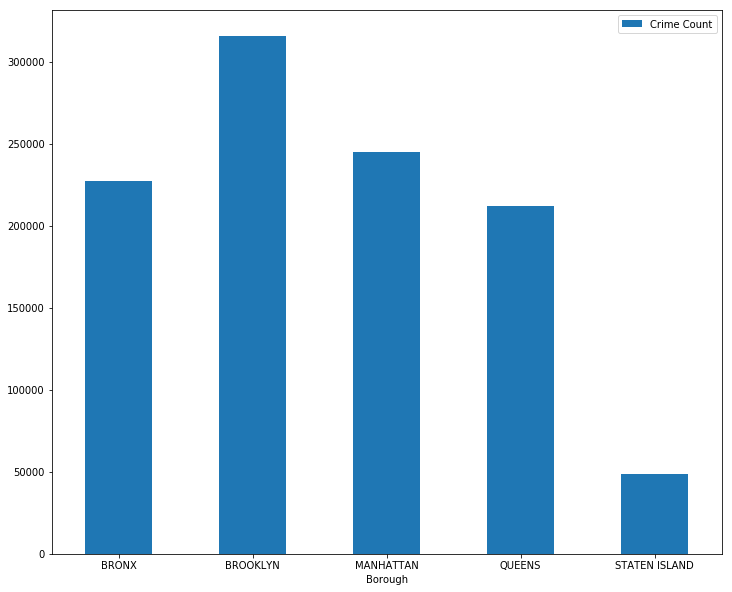

In [23]:
df_crimecount_frame.plot.bar(x='Borough', y='Crime Count', rot=0, figsize=(12,10))

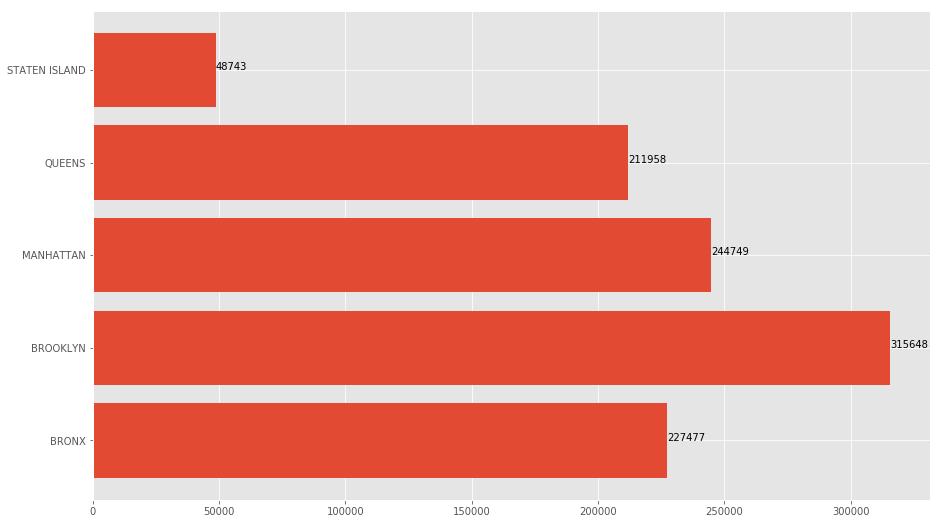

In [40]:
x=df_crimecount_frame["Borough"]
y=df_crimecount_frame["Crime Count"]
plt.figure(figsize=(15,9))
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [24]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


## 4 Data Analysis
### a. The Foursquare API was used to obtain neighborhood venue data. One Hot encoding was performed on the venue data to allow it to be better consumed by a Machine Learning algorithm. 
### b. In addition to K-Means clustering to help focus the neighborhoods, the dataframes for those neighborhoods were used to perform further analysis. A join of the “Top 10” neighborhoods for venue count with the neighborhoods that have parks, and it was found that three neighborhoods would be ideal for a family with school-aged children: St. George, Stapleton and Grasmere.
### c. Maps were developed to give the reader an understanding of the area under analysis.  


In [25]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [26]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [27]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [28]:
neighborhoods_data = newyork_data['features']

In [29]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [30]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [31]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [32]:
statenisland_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
statenisland_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [21]:
CLIENT_ID = 'xxx' # your Foursquare ID - this was removed
CLIENT_SECRET = 'xxx' # your Foursquare Secret - this was removed
VERSION = '20180605' # Foursquare API version

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



CLIENT_ID: BEAPWRG0JOWTWTNU4CZIMAJ02AAM5MBOVSLA1OMMY4X2T5CT
CLIENT_SECRET:WP0TC2MBBCNKCBWXMACGMDZCLTPPCJDDBK3W5FVKQ0PLIYHS


In [22]:
statenisland_data.loc[0, 'Neighborhood']

NameError: name 'statenisland_data' is not defined

In [41]:
neighborhood_latitude = statenisland_data.loc[0, 'Latitude'] # neighborhood latitude value

neighborhood_longitude = statenisland_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = statenisland_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))



Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


In [42]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=BEAPWRG0JOWTWTNU4CZIMAJ02AAM5MBOVSLA1OMMY4X2T5CT&client_secret=WP0TC2MBBCNKCBWXMACGMDZCLTPPCJDDBK3W5FVKQ0PLIYHS&v=20180605&ll=40.6449815710044,-74.07935312512797&radius=500&limit=100'

In [44]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea4fbbbaba297001b5bfea5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 36,
  'suggestedBounds': {'ne': {'lat': 40.6494815755044,
    'lng': -74.07343346476772},
   'sw': {'lat': 40.6404815665044, 'lng': -74.08527278548821}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6924c46d4a5938e7ac6c0',
       'name': 'A&S Pizzeria',
       'location': {'address': '87 Stuyvesant Pl',
        'crossStreet': 'Wall st',
        'lat': 40.64393953223924,
        'lng': -74.0776259226109,
 

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [80]:
# type your answer here

statenisland_venues = getNearbyVenues(names=statenisland_data['Neighborhood'],
                                   latitudes=statenisland_data['Latitude'],
                                   longitudes=statenisland_data['Longitude']
                                  )


St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [73]:
print(statenisland_venues.shape)
statenisland_venues.head()


(824, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint


In [79]:
#statenisland_venues['Venue Category'].value_counts()

statenisland_venue_count_by_neigh = statenisland_venues.groupby('Neighborhood').count()

In [90]:
top_10 = statenisland_venue_count_by_neigh.nlargest(10,'Venue Category')
top_10 = top_10.reset_index()
top_10


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bulls Head,45,45,45,45,45,45
1,Eltingville,42,42,42,42,42,42
2,West Brighton,38,38,38,38,38,38
3,St. George,36,36,36,36,36,36
4,Charleston,31,31,31,31,31,31
5,Stapleton,31,31,31,31,31,31
6,Rosebank,29,29,29,29,29,29
7,Dongan Hills,24,24,24,24,24,24
8,Grant City,24,24,24,24,24,24
9,Grasmere,24,24,24,24,24,24


In [ ]:
#df[df['A'].str.contains("hello")]

In [106]:
statenisland_venues_park = statenisland_venues_park[statenisland_venues_park['Venue Category'].str.contains("Park")]
statenisland_venues_park

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
32,St. George,40.644982,-74.079353,Fort Hill,40.641511,-74.080522,Park
33,St. George,40.644982,-74.079353,Maritime Hospital Quarantine Cemetery,40.641593,-74.077730,Park
42,New Brighton,40.640615,-74.087017,Bocce Courts,40.639800,-74.090000,Park
47,New Brighton,40.640615,-74.087017,Mahoney Park,40.643793,-74.085313,Park
54,Stapleton,40.626928,-74.077902,5050 Skatepark,40.628053,-74.074548,Skate Park
61,Stapleton,40.626928,-74.077902,Tappen Park,40.626872,-74.076857,Park
149,Todt Hill,40.597069,-74.111329,St Francis Woodlands,40.599524,-74.114515,Park
222,Travis,40.586314,-74.190737,Dr Seuss Park!,40.590062,-74.188161,Park
364,Tompkinsville,40.637316,-74.080554,Tompkinsville Park,40.637511,-74.076267,Park
429,Grasmere,40.598268,-74.076674,Fingerboard Ave Bridge,40.598729,-74.078504,Park


In [108]:
statenisland_venues_park_count = statenisland_venues_park.groupby('Neighborhood').count()
statenisland_venues_park_count 


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bloomfield,2,2,2,2,2,2
Clifton,1,1,1,1,1,1
Concord,1,1,1,1,1,1
Grasmere,1,1,1,1,1,1
New Brighton,2,2,2,2,2,2
Randall Manor,1,1,1,1,1,1
St. George,2,2,2,2,2,2
Stapleton,2,2,2,2,2,2
Todt Hill,1,1,1,1,1,1


In [109]:
statenisland_venues_park_count = statenisland_venues_park_count.reset_index()
statenisland_venues_park_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bloomfield,2,2,2,2,2,2
1,Clifton,1,1,1,1,1,1
2,Concord,1,1,1,1,1,1
3,Grasmere,1,1,1,1,1,1
4,New Brighton,2,2,2,2,2,2
5,Randall Manor,1,1,1,1,1,1
6,St. George,2,2,2,2,2,2
7,Stapleton,2,2,2,2,2,2
8,Todt Hill,1,1,1,1,1,1
9,Tompkinsville,1,1,1,1,1,1


In [127]:
#join_table = staten_island_venues_park.join(statenisland_venues_count_by_neigh.set_index('Neighborhood'), on='Neighborhood')

#df.join(other.set_index('key'), on='key')

In [176]:
Where_To_Live = pd.Series(statenisland_venues_park_count.Neighborhood.isin(top_10.Neighborhood).values, statenisland_venues_park_count.Neighborhood.values)

In [186]:
Where_To_Live

#Where_To_Live = Where_To_Live.to_frame()

,0
Bloomfield,False
Clifton,False
Concord,False
Grasmere,True
New Brighton,False
Randall Manor,False
St. George,True
Stapleton,True
Todt Hill,False
Tompkinsville,False


In [185]:
#Where_To_Live.rename(columns={"0": "Decision"},inplace=True)
#Where_To_Live

#Where_To_Live.rename['0':'Decision']
#Where_To_Live = Where_To_Live.rename(columns={'0':'Decision'}, inplace=True)
#Where_To_Live["Decision"].replace({"False":"No", "True":"Yes"})


#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#print(df)
#Where_To_Live.rename(columns={'0':'Decision'}, inplace=True)

#table = Where_To_Live.rename(columns={'index':'Neighborhood'}, inplace=True)
#table

#df.rename(columns={"A": "a", "B": "c"})

In [ ]:

#join_table = statenisland_venues_park_count.Neighborhood.isin(top_10.Neighborhood)
#join_table

#np.where(statenisland_venues_park_count.Neighborhood.isin(top_10.Neighborhood), staten_island_venues_park_count,'')

#np.where(df2.col.isin(df1.col), df1.col, 'NO_MATCH')

In [ ]:
#Map of NYC
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

In [ ]:
# Load Data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [ ]:
#Examine Data
newyork_data

In [38]:
neighborhoods_data = newyork_data['features']

In [39]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [40]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [41]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

NameError: name 'Nominatim' is not defined

In [42]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

NameError: name 'folium' is not defined

In [ ]:
staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

In [ ]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

In [ ]:
# create map of Staten Island using latitude and longitude values
map_staten = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

In [ ]:
#Foursquare Credential and Version

In [ ]:
staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

In [ ]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

In [ ]:
CLIENT_ID = 'BEAPWRG0JOWTWTNU4CZIMAJ02AAM5MBOVSLA1OMMY4X2T5CT' # your Foursquare ID
CLIENT_SECRET = 'WP0TC2MBBCNKCBWXMACGMDZCLTPPCJDDBK3W5FVKQ0PLIYHS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
staten_data.loc[0, 'Neighborhood']

In [ ]:
neighborhood_latitude = staten_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = staten_data.loc[0, 'Longitude'] # neighborhood longitude value
​
neighborhood_name = staten_data.loc[0, 'Neighborhood'] # neighborhood name
​
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

In [ ]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

In [ ]:
results = requests.get(url).json()
results 


In [ ]:
#ADD for final
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [ ]:
#ADD for final
# set number of clusters
kclusters = 3

staten_grouped_clustering = staten_grouped_clustering.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



In [ ]:
results = requests.get(url).json()
results 

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# type your answer here

staten_venues = getNearbyVenues(names=staten_data['Neighborhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )


In [ ]:
print(staten_venues.shape)
staten_venues.head()

In [ ]:
staten_venues.groupby('Neighborhood').count()

In [ ]:
print('There are {} uniques categories.'.format(len(staten_venues['Venue Category'].unique())))

In [ ]:
# one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

In [ ]:
staten_onehot.shape

In [ ]:
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped

In [ ]:
staten_grouped.shape

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

In [ ]:
# set number of clusters
kclusters = 3

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = staten_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head() # check the last columns!

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

In [ ]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]